In [1]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
THRESHOLDCSV = pd.read_csv('27 nov muon/THRESHOLDCSV.CSV', sep=';', decimal=',')
THRESHOLDCSV

,THR,SC,NOSC
0,-7,59.37730,59.79280
1,-9,23.52140,21.79550
2,-11,6.07100,5.87155
3,-13,3.18650,2.98520
4,-15,0.99425,0.81305
5,-17,0.34775,0.30805
6,-19,0.17380,0.14255
7,-21,0.05200,0.03535
8,-23,0.02380,0.01630
9,-25,0.01270,0.00730


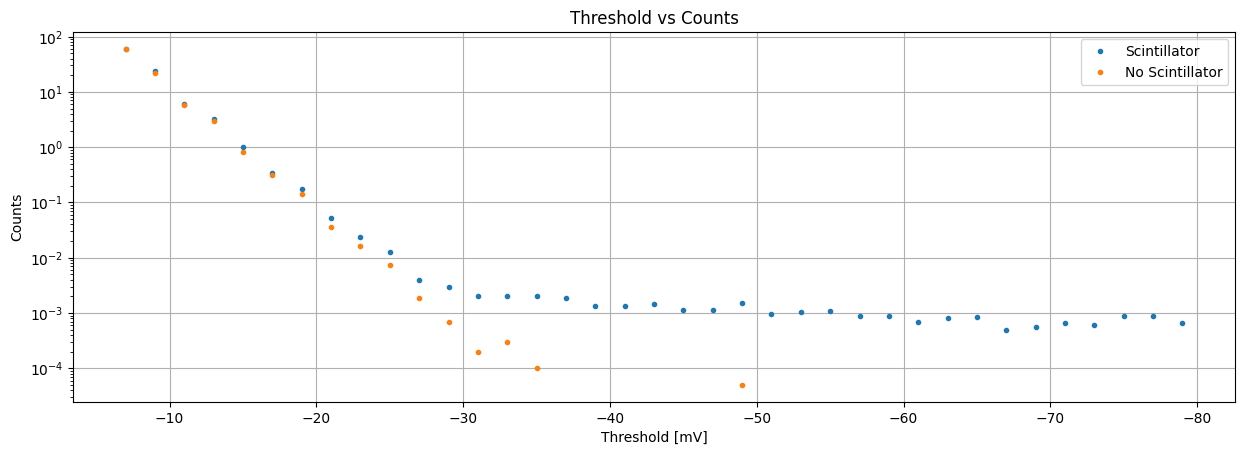

In [8]:
x = np.array(THRESHOLDCSV['THR']) #np.abs(np.array(THRESHOLDCSV['THR']))
ySC = np.array(THRESHOLDCSV['SC'])
yNOSC = np.array(THRESHOLDCSV['NOSC'])

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(x, ySC, '.', label='Scintillator')
ax.plot(x, yNOSC, '.', label='No Scintillator')
ax.set_xlabel('Threshold [mV]')
ax.set_ylabel('Counts')
ax.set_title('Threshold vs Counts')
ax.legend()
ax.set_yscale('log')
ax.grid()
#mirror the x axis
ax.invert_xaxis()
#save the plot with dpi = 600
plt.savefig('threshold_vs_counts.png', dpi=600)
plt.show()


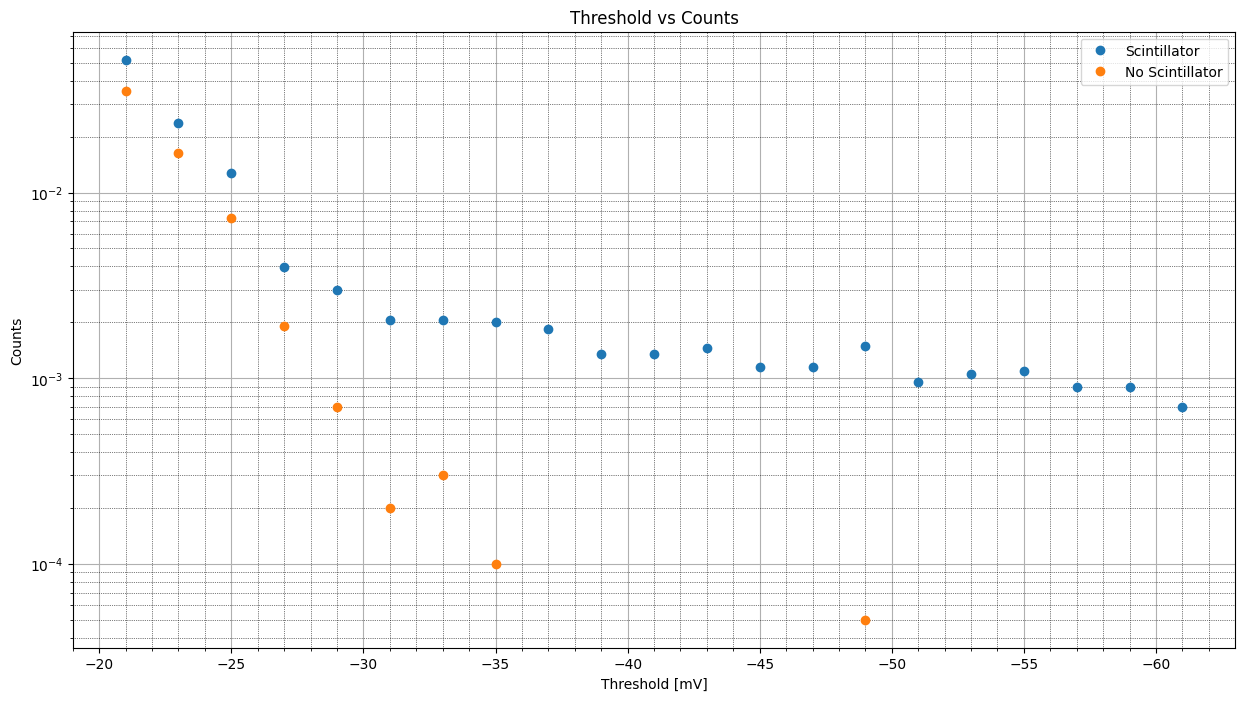

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)
ax.plot(x[7:28], ySC[7:28], 'o', label='Scintillator')
ax.plot(x[7:28], yNOSC[7:28], 'o', label='No Scintillator')
ax.set_xlabel('Threshold [mV]')
ax.set_ylabel('Counts')
ax.set_title('Threshold vs Counts')
ax.legend()
ax.set_yscale('log')
ax.grid()
ax.invert_xaxis()
ax.minorticks_on()
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#save the plot with dpi = 600
plt.savefig('threshold_vs_counts_zoom.png', dpi=600)
plt.show()

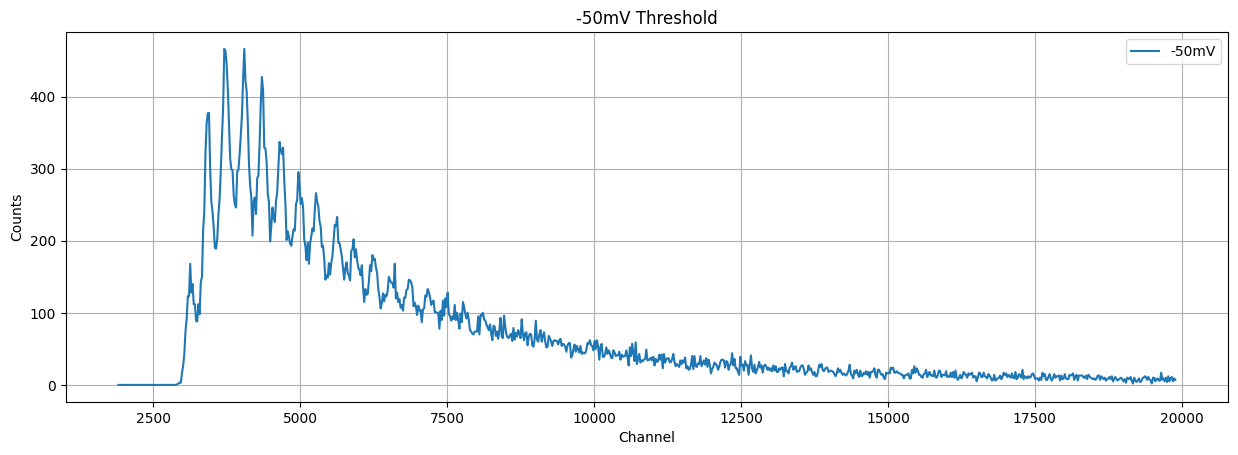

In [5]:
#SOGLIA -50mV
muon50 = pd.read_csv('27 nov muon/muon-2728.CSV', sep=';')

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(muon50['Channel'][100:1000], muon50['Counts'][100:1000], label='-50mV')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.set_title('-50mV Threshold')
ax.legend()
ax.grid()
#save the plot with dpi = 600
plt.savefig('muon50.png', dpi=600)
plt.show()

In [6]:
time = 68384
total_events = np.sum(np.array(muon50['Counts']))
rate = total_events/time
err_rate = np.sqrt(total_events)/time

print('Total events: ', total_events)
print('Rate: ', rate, 'Hz')
print('Error rate: ', err_rate, 'Hz')
print('Rate measured with HERA: 0.923 ± 0.063')
print('Flux: ', rate*60/22.09, 'Hz')
print('Error flux: ', err_rate*60/22.09, 'Hz')
print('Rate measured with HERA: 0.923 ± 0.063')

Total events:  69427
Rate:  1.0152521057557324 Hz
Error rate:  0.0038530948432724207 Hz
Rate measured with HERA: 0.923 ± 0.063
Flux:  2.757588336140514 Hz
Error flux:  0.010465626554836816 Hz
Rate measured with HERA: 0.923 ± 0.063


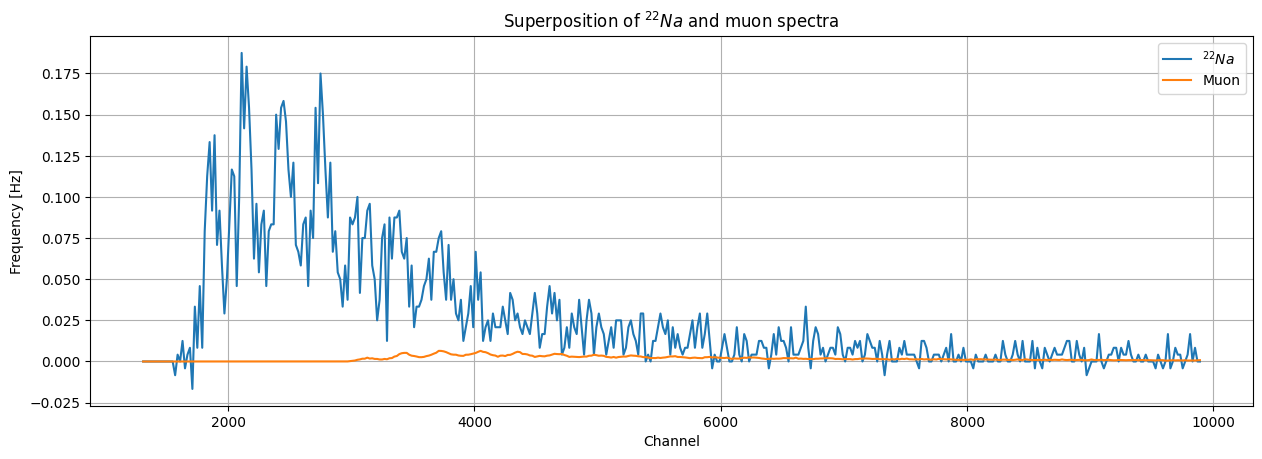

In [7]:
mixed = pd.read_csv('normalized-muondata.CSV', sep=';', decimal=',')
xmixed = np.array(mixed['Channel'])
smixed = np.array(mixed['Source'])
mmixed = np.array(mixed['Muon'])

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(xmixed[70:500], smixed[70:500], label='$^{22}Na$')
ax.plot(xmixed[70:500], mmixed[70:500], label='Muon')
ax.set_xlabel('Channel')
ax.set_ylabel('Frequency [Hz]')
ax.set_title('Superposition of $^{22}Na$ and muon spectra')
ax.legend()
ax.grid()
#log scale
#ax.set_yscale('log')
#save the plot with dpi = 600
plt.savefig('mixed.png', dpi=600)
plt.show()